# Interpretable Machine Learning with SHAP Values

In [104]:
import pandas as pd
import lightgbm as lgb
import shap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

shap.initjs()

np.random.seed(1234)

X, y = shap.datasets.california()

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9101,3.1946,5.0,5.618619,1.061061,3569.0,3.572573,34.57,-117.93
16450,4.1190,38.0,5.506876,0.982318,1223.0,2.402750,38.14,-121.28
10247,6.6897,22.0,7.408784,1.001689,1915.0,3.234797,33.89,-117.86
664,3.9702,36.0,5.297071,0.953975,606.0,2.535565,37.70,-122.14
3198,3.5486,4.0,6.208333,1.305000,1478.0,2.463333,36.37,-119.65
...,...,...,...,...,...,...,...,...
8222,5.0000,21.0,3.062500,0.875000,29.0,1.812500,33.76,-118.23
9449,2.7530,14.0,5.789030,1.170886,1153.0,2.432489,37.39,-119.85
8471,4.2083,33.0,5.026163,1.151163,1073.0,3.119186,33.91,-118.32
17048,6.7058,44.0,6.335430,0.991614,1235.0,2.589099,37.47,-122.27


In [7]:
linear_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train[linear_features], y_train)

LinearRegression()

In [9]:
for name, c in zip(linear_features, linear_model.coef_.tolist()):
    print(f"{name}:  {c}")

MedInc:  0.5405566502134826
HouseAge:  0.016600022061065964
AveRooms:  -0.22350074963940791
AveBedrms:  1.0370771799251242
Population:  2.151568998442349e-05
AveOccup:  -0.004539036845932185


In [69]:
X_test[linear_features].values

array([[3.68120000e+00, 5.20000000e+01, 4.84831461e+00, 1.07865169e+00,
        6.14000000e+02, 1.72471910e+00],
       [5.55240000e+00, 5.20000000e+01, 6.12903226e+00, 1.04193548e+00,
        1.84200000e+03, 2.97096774e+00],
       [3.87500000e+00, 4.40000000e+01, 4.73926380e+00, 1.02453988e+00,
        5.61000000e+02, 1.72085890e+00],
       ...,
       [6.43210000e+00, 5.00000000e+00, 7.17981073e+00, 9.81072555e-01,
        1.15800000e+03, 3.65299685e+00],
       [1.50780000e+00, 2.20000000e+01, 3.96684350e+00, 1.04907162e+00,
        2.48600000e+03, 3.29708223e+00],
       [3.19790000e+00, 1.70000000e+01, 5.46103896e+00, 9.48051948e-01,
        4.73000000e+02, 3.07142857e+00]])

In [100]:
linear_model.intercept_ + 3.68120000e+00 * 0.5405566502134826 + 5.20000000e+01 * 0.016600022061065964 + 4.84831461e+00 * -0.22350074963940791 + 1.07865169e+00 * 1.0370771799251242 + 6.14000000e+02 * 2.151568998442349e-05 + 1.72471910e+00 * -0.004539036845932185


2.44949868402779

In [116]:
linear_components = np.multiply(X_test[linear_features].values, linear_model.coef_).sum(axis=1) + linear_model.intercept_

In [117]:
np.allclose(linear_components, linear_model.predict(X_test[linear_features]))

True

In [144]:
p = np.repeat(linear_model.intercept_, 5160)
q = np.multiply(X_test[linear_features].values, linear_model.coef_)

In [149]:
q

array([[ 1.98989714,  0.86320115, -1.08360195,  1.11864505,  0.01321063,
        -0.00782856],
       [ 3.00138674,  0.86320115, -1.3698433 ,  1.08056751,  0.0396319 ,
        -0.01348533],
       [ 2.09465702,  0.73040097, -1.05922901,  1.06252693,  0.0120703 ,
        -0.00781104],
       ...,
       [ 3.47691443,  0.08300011, -1.60469308,  1.01744796,  0.02491517,
        -0.01658109],
       [ 0.81505132,  0.36520049, -0.8865925 ,  1.08796824,  0.05348801,
        -0.01496558],
       [ 1.72864611,  0.28220038, -1.2205463 ,  0.98320304,  0.01017692,
        -0.01394133]])

In [151]:
p.reshape((-1,1))

array([[-0.44402478],
       [-0.44402478],
       [-0.44402478],
       ...,
       [-0.44402478],
       [-0.44402478],
       [-0.44402478]])

In [152]:
np.concatenate([p.reshape(-1,1), q], axis = 1)

array([[-0.44402478,  1.98989714,  0.86320115, ...,  1.11864505,
         0.01321063, -0.00782856],
       [-0.44402478,  3.00138674,  0.86320115, ...,  1.08056751,
         0.0396319 , -0.01348533],
       [-0.44402478,  2.09465702,  0.73040097, ...,  1.06252693,
         0.0120703 , -0.00781104],
       ...,
       [-0.44402478,  3.47691443,  0.08300011, ...,  1.01744796,
         0.02491517, -0.01658109],
       [-0.44402478,  0.81505132,  0.36520049, ...,  1.08796824,
         0.05348801, -0.01496558],
       [-0.44402478,  1.72864611,  0.28220038, ...,  0.98320304,
         0.01017692, -0.01394133]])

In [154]:
linear_components = np.concatenate(
    [np.repeat(linear_model.intercept_, 5160).reshape((-1, 1)), 
     np.multiply(X_test[linear_features].values, linear_model.coef_)], axis = 1)

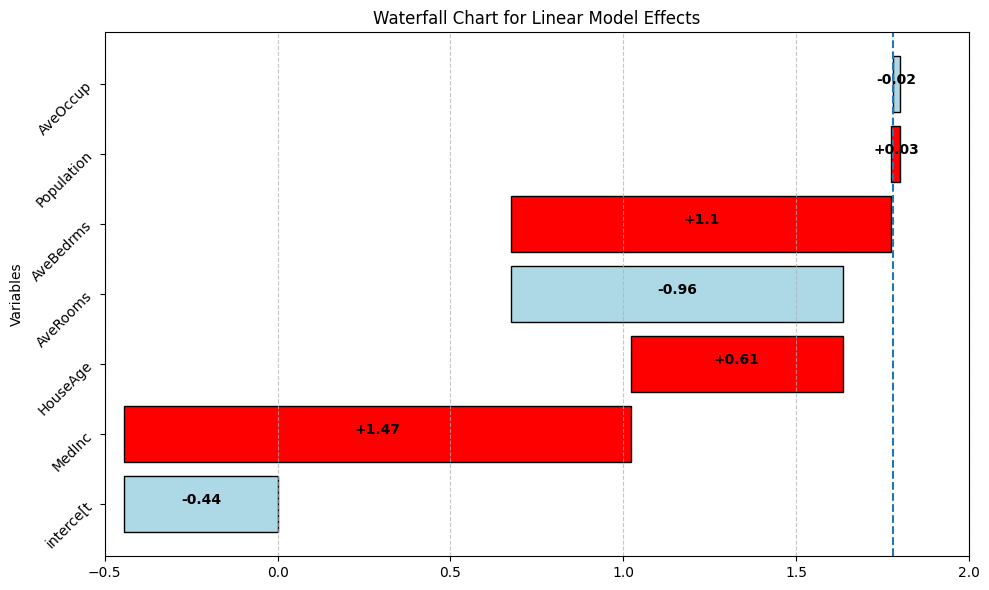

In [178]:
values = linear_components[11, :]
labels = ['interce[t'] + linear_features

# Calculate the cumulative values
cumulative = np.cumsum(values)
cumulative = np.insert(cumulative, 0, 0)  # Insert a starting point of 0 for visual clarity

# The positions where each bar starts
starts = cumulative[:-1]

# Define colors for positive and negative changes
colors = ['red' if val >= 0 else 'lightblue' for val in values]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each bar
for i in range(len(values)):
    ax.barh(i, values[i], left=starts[i], color=colors[i], edgecolor='black')

# Add labels to each bar for clarity
for i in range(len(values)):
    ax.text(starts[i] + values[i] / 2, i, f'{round(values[i],2):+}', ha='center', color='black', fontweight='bold')

# Configure x-axis with labels
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels, rotation=45, ha='right')

# Add labels and title
ax.set_ylabel('Variables')
ax.set_title('Waterfall Chart for Linear Model Effects')

# Add a grid for readability
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_xlim((-0.5, 2))
ax.axvline(values.sum(), linestyle='--')
# Show the plot
plt.tight_layout()
plt.show()

In [5]:
# params = {
#     "max_bin": 40,
#     "boosting_type":"gbdt",
#     "metric": "l2",
#     "num_leaves":50,
#     "verbose":-1,
#     "random_seed": 1234
# }

model = RandomForestRegressor(
    n_estimators = 75,
    criterion="squared_error",
    max_depth=4,
    min_samples_split=10,
    max_features="sqrt"
)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

shap_model = shap.TreeExplainer(model)

In [6]:
shap_values = shap_model(X_test)

In [7]:
shap_model.expected_value

array([2.06469573])

In [8]:
X_test.shape

(5160, 8)

In [9]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9101,3.1946,5.0,5.618619,1.061061,3569.0,3.572573,34.57,-117.93
16450,4.1190,38.0,5.506876,0.982318,1223.0,2.402750,38.14,-121.28
10247,6.6897,22.0,7.408784,1.001689,1915.0,3.234797,33.89,-117.86
664,3.9702,36.0,5.297071,0.953975,606.0,2.535565,37.70,-122.14
3198,3.5486,4.0,6.208333,1.305000,1478.0,2.463333,36.37,-119.65
...,...,...,...,...,...,...,...,...
8222,5.0000,21.0,3.062500,0.875000,29.0,1.812500,33.76,-118.23
9449,2.7530,14.0,5.789030,1.170886,1153.0,2.432489,37.39,-119.85
8471,4.2083,33.0,5.026163,1.151163,1073.0,3.119186,33.91,-118.32
17048,6.7058,44.0,6.335430,0.991614,1235.0,2.589099,37.47,-122.27


In [10]:
# check that the sum of the SHAP values equals the model predictions
np.allclose(np.sum(shap_values.values, axis=1) + shap_model.expected_value, y_pred)

True

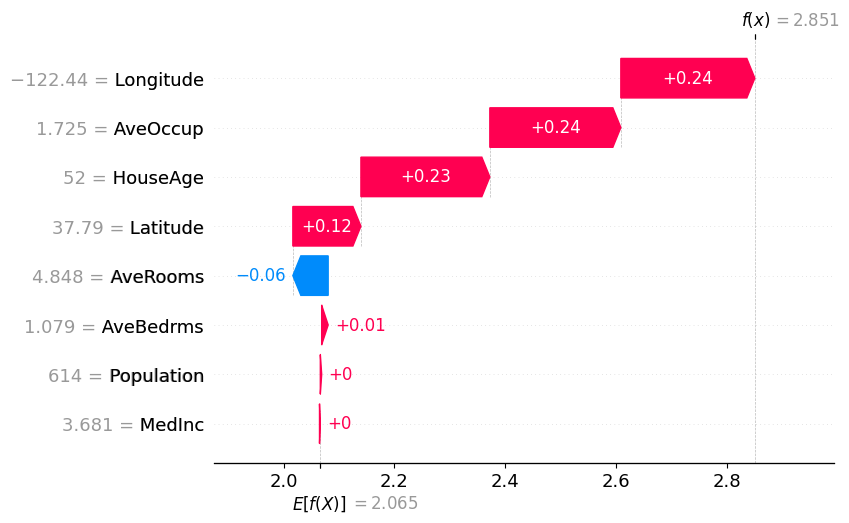

In [11]:
shap.plots.waterfall(shap_values[0, ...])

In [12]:
shap.plots.force(shap_values[0, ...])

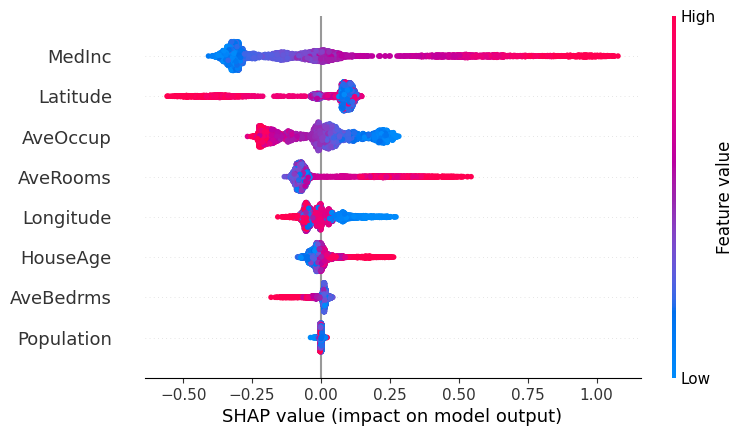

In [13]:
shap.plots.beeswarm(shap_values)

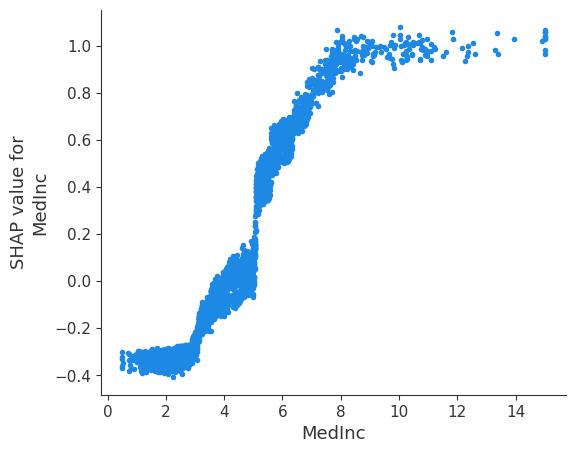

In [17]:
shap.dependence_plot("MedInc", shap_values.values, X_test, interaction_index=None)

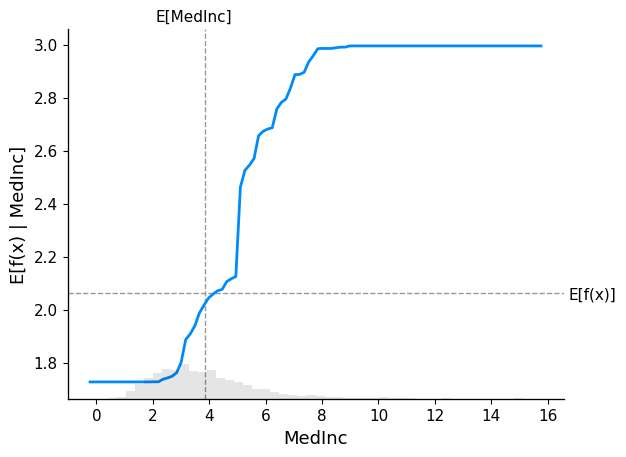

In [18]:
shap.partial_dependence_plot("MedInc", model.predict, X_test, ice=False, model_expected_value=True, feature_expected_value=True)

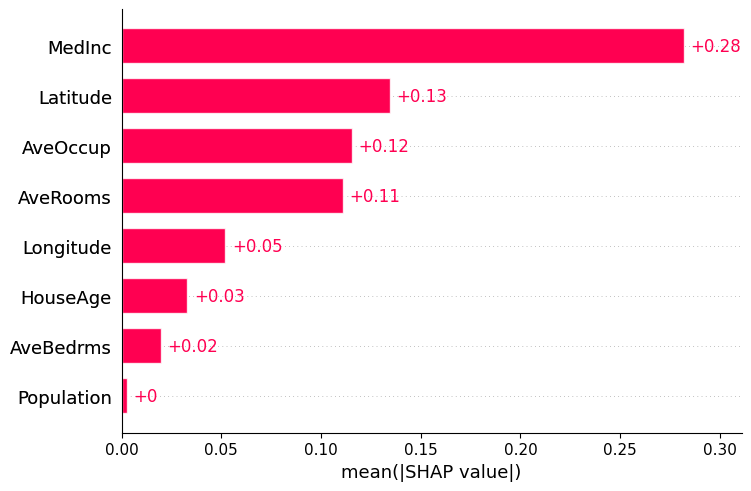

In [19]:
shap.plots.bar(shap_values)